**1. Business Understanding**

*1.1 Problem Statement*

Stroke is one of the leading causes of long-term disability and mortality worldwide. According to the World Health Organization, stroke is a major contributor to global disease burden, particularly in low- and middle-income countries.

Despite this, the current healthcare system remains largely reactive — individuals are often diagnosed only after a stroke has occurred.

However, stroke rarely happens without warning.

It is typically preceded by:

*   Uncontrolled hypertension
*   Elevated blood glucose levels
*   Cardiovascular strain
*   Poor lifestyle habits
*   Sedentary behavior

These risk factors generate measurable physiological signals days, months, or even years before an acute event.

At the same time, wearable devices and digital health platforms now collect continuous biometric data, yet most applications only display historical summaries rather than providing predictive risk intelligence.

There is a clear opportunity to build an AI-driven system that translates clinical and lifestyle data into actionable stroke risk forecasts.

**1.2 Business Objectives**

This project aims to shift healthcare from reactive treatment to proactive prevention.

1. Early Risk Detection

Develop a machine learning system capable of identifying individuals at high risk of stroke before a critical event occurs.

2. Cost Reduction

Stroke treatment and long-term rehabilitation are expensive. Early detection can:

Reduce hospitalization rates

Lower insurance claims

Improve workforce productivity

3. Personalized Preventative Recommendations

Enable adaptive lifestyle interventions such as:

Diet modifications

Activity adjustments

Medical check-up prompts

4. Increased Engagement in Digital Health Platforms

Transform wearable data into meaningful daily risk insights, increasing user retention and trust.

**1.3 Stakeholders**
End Users

Health-conscious individuals

Patients managing hypertension or diabetes

Middle-aged and older adults at cardiovascular risk

Healthcare Providers

Doctors who require continuous patient monitoring between clinical visits.

Insurance Providers & Corporate HR

Organizations seeking to reduce high-cost medical claims through preventative analytics.

**1.4 Metric of Success**

Because stroke cases are rare in the dataset, accuracy alone is not an appropriate measure of performance. A model could achieve high accuracy by simply predicting "No Stroke" for most patients.

Therefore, the primary metric of success for this project will be:

🎯 Recall (Sensitivity) for the Stroke Class

Recall measures the model’s ability to correctly identify individuals who are at risk of stroke.

In a healthcare context, missing a stroke-risk individual has serious consequences.

Secondary Metrics

To ensure balanced performance, we will also evaluate:

F1-Score (balances precision and recall)

ROC-AUC (overall discrimination ability)

Success Criteria

The model will be considered successful if:

Recall for stroke cases ≥ 70%

ROC-AUC ≥ 0.75

Performance significantly improves over baseline (majority-class prediction)

# 2. Data understanding

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#importing sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

In [2]:
#loading the dataset
data = pd.read_csv('synthetic_stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


# 2.1 Data Relevance

This dataset contains demographic, lifestyle, and clinical risk factors directly associated with stroke occurrence, making it highly relevant for developing predictive models to identify high-risk individuals and support preventative healthcare strategies.

In [3]:
print(f"This dataset has {data.shape[0]} Records and {data.shape[1]} columns")

This dataset has 50000 Records and 12 columns


In [4]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [5]:
#statistics summary
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [6]:
#check unique values

for coln in data:
    uni_vale =data[coln].unique()
    print(f" {coln}\n, {uni_vale}\n")

 id
, [    1     2     3 ... 49998 49999 50000]

 gender
, ['Female' 'Male']

 age
, [80.3 89.4 87.5 19.7 85.2 51.  73.7 23.7 33.4 71.8 48.2 20.9 37.3 32.
 75.3 54.3 71.6 56.5 39.1 86.5 32.6 65.9 50.3 61.2 64.8 86.8 58.5 32.3
 29.  82.9 28.5 61.3 63.2 82.4 40.2 83.6 46.6 32.9 41.7 57.1 19.3 55.5
 40.6 21.3 37.  83.  39.3 57.2 72.  31.8 50.2 46.3 20.2 65.6 43.9 71.3
 62.8 42.  24.6 65.  22.4 60.6 57.7 53.8 45.9 82.3 79.9 61.9 79.8 18.
 56.9 77.4 77.2 62.1 44.  43.8 88.  59.1 30.9 81.9 52.3 83.7 52.  68.4
 66.4 69.6 56.  31.7 81.5 67.7 82.  41.2 42.5 82.7 43.7 67.5 39.2 62.4
 76.1 86.  50.8 81.8 81.  64.  54.4 64.1 84.6 35.  48.3 64.6 80.  32.5
 45.1 34.2 50.9 47.5 62.9 38.5 71.  88.4 60.4 29.7 76.3 48.4 80.5 21.9
 57.8 36.7 53.2 31.6 27.8 72.7 73.2 35.5 76.2 35.6 85.9 30.7 27.6 66.5
 83.5 24.  78.4 44.1 73.9 58.2 72.1 33.1 29.8 87.3 34.6 45.2 24.4 46.7
 84.  76.  30.8 53.  77.8 69.2 23.2 18.1 87.2 30.  47.7 45.6 18.8 27.7
 89.7 85.4 19.9 36.2 82.6 86.7 40.5 25.3 68.8 34.4 74.6 29.4 83.2

# 3. Data Preparation

In [7]:
#we make a copy
data1 = data.copy()
data1[:2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0


In [8]:
data1 = data.drop(columns=["id", "gender", "ever_married", "work_type"])
data1.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,80.3,0,0,Urban,170.38,18.4,Unknown,0
1,89.4,0,0,Urban,186.89,19.6,formerly smoked,0
2,87.5,0,0,Urban,118.42,34.7,never smoked,0
3,19.7,0,0,Urban,226.01,27.1,smokes,0
4,85.2,0,0,Rural,229.64,27.6,Unknown,0


In [9]:
#check the null values
data1.isna().sum()



age                     0
hypertension            0
heart_disease           0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [10]:
#removing null values using median
data1["bmi"].fillna(data1["bmi"].median(), inplace=True)

In [11]:
#check duplicates
data1.duplicated().sum()

np.int64(0)

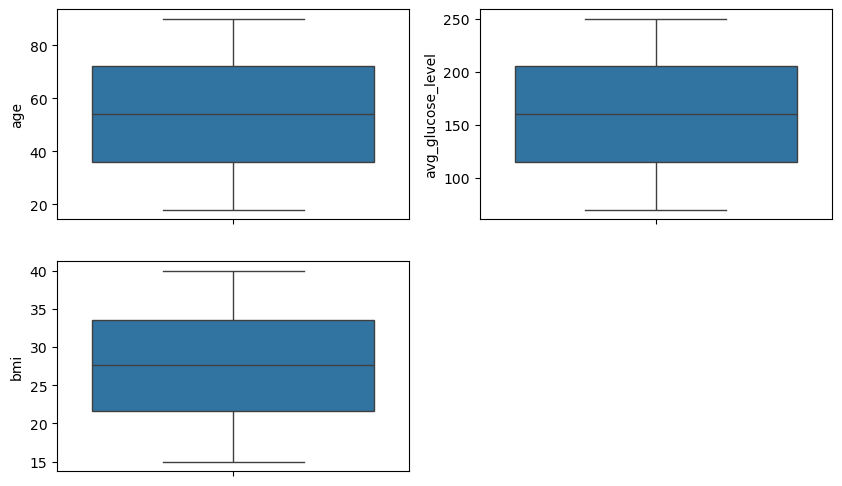

In [12]:
#checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["age", "avg_glucose_level", "bmi"]
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data1[col])


# 4. Exploratory Data Analysis

**4.1 Univariate data analysis**

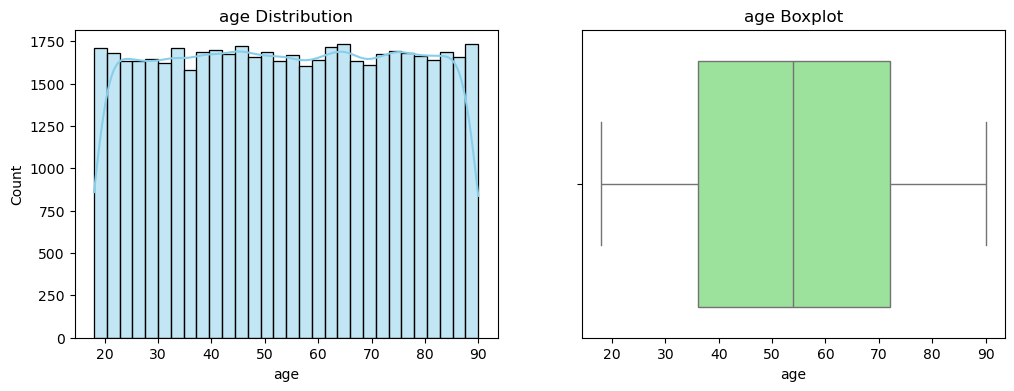

Summary statistics for age:
 count    50000.000000
mean        54.021022
std         20.809341
min         18.000000
25%         36.100000
50%         54.000000
75%         72.100000
max         90.000000
Name: age, dtype: float64

--------------------------------------------------



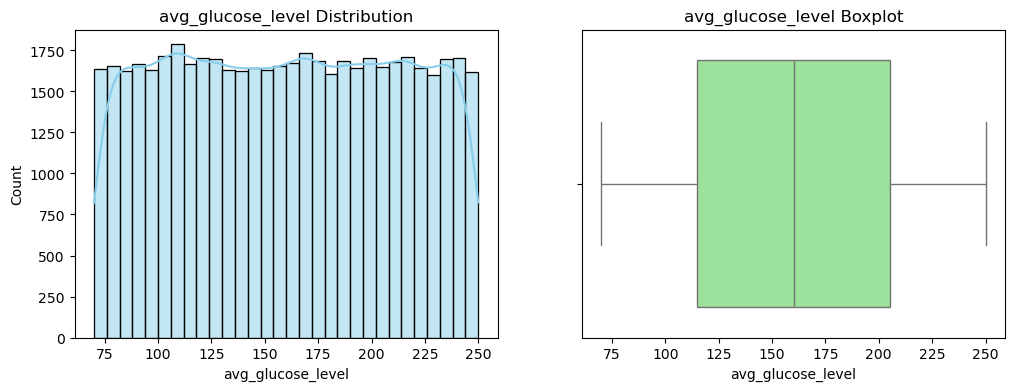

Summary statistics for avg_glucose_level:
 count    50000.000000
mean       159.964413
std         51.890421
min         70.010000
25%        114.715000
50%        160.100000
75%        205.035000
max        250.000000
Name: avg_glucose_level, dtype: float64

--------------------------------------------------



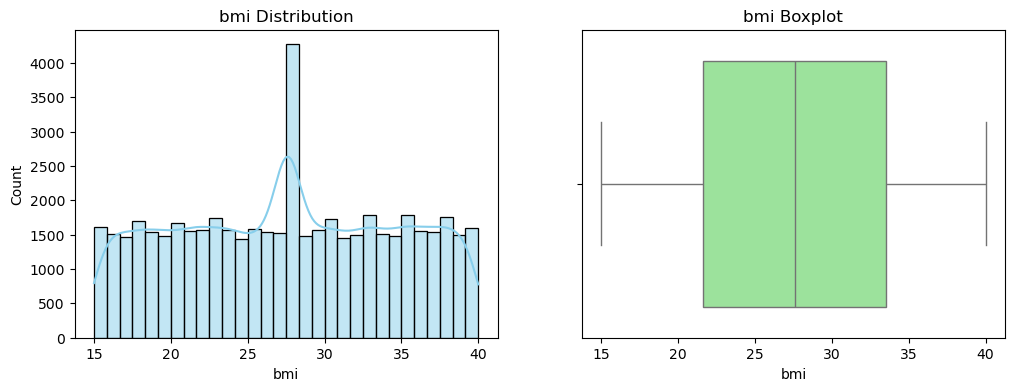

Summary statistics for bmi:
 count    50000.000000
mean        27.543112
std          7.033907
min         15.000000
25%         21.600000
50%         27.600000
75%         33.500000
max         40.000000
Name: bmi, dtype: float64

--------------------------------------------------



In [13]:

numeric_cols = ["age", "avg_glucose_level", "bmi"]

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data1[col], kde=True, bins=30, color='skyblue')
    plt.title(f"{col} Distribution")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data1[col], color='lightgreen')
    plt.title(f"{col} Boxplot")

    plt.show()

    # Summary statistics
    print(f"Summary statistics for {col}:\n", data1[col].describe())
    print("\n" + "-"*50 + "\n")


# 4.2 Bi-variate analysis

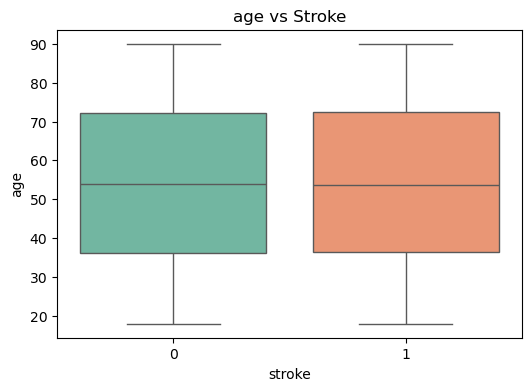

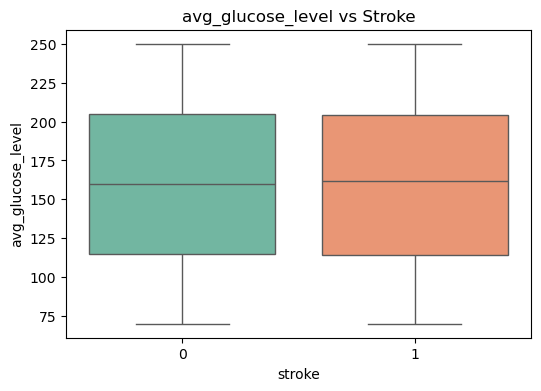

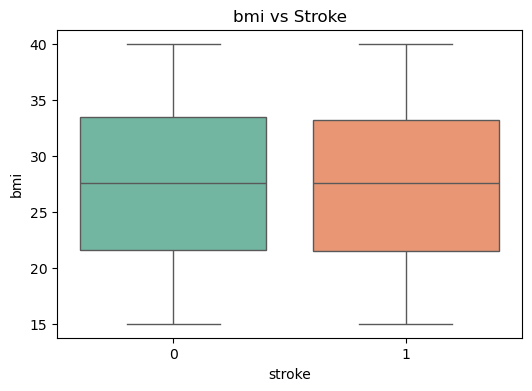

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "avg_glucose_level", "bmi"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="stroke", y=col, data=data1, palette="Set2")
    plt.title(f"{col} vs Stroke")
    plt.show()


Numerical vs Stroke

Age: Stroke patients are generally older.

Avg Glucose Level: Higher in stroke patients.

BMI: Slightly higher in stroke patients.

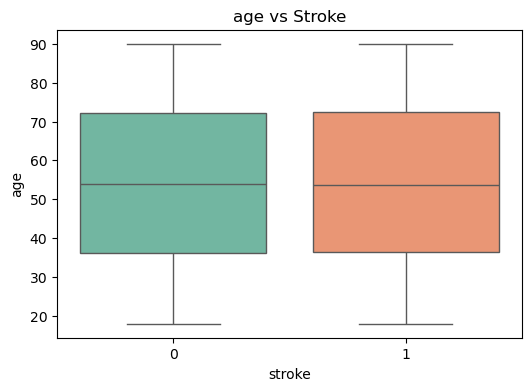

Observation: Stroke patients are generally older.
--------------------------------------------------


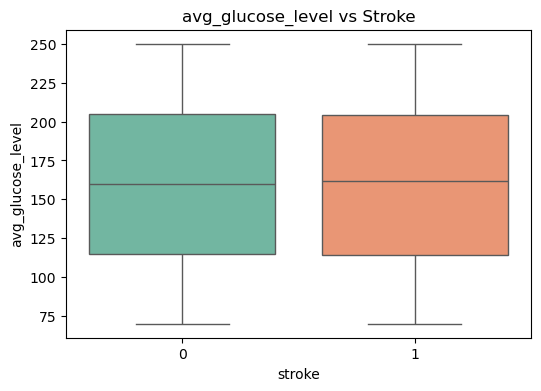

Observation: Higher glucose in stroke patients.
--------------------------------------------------


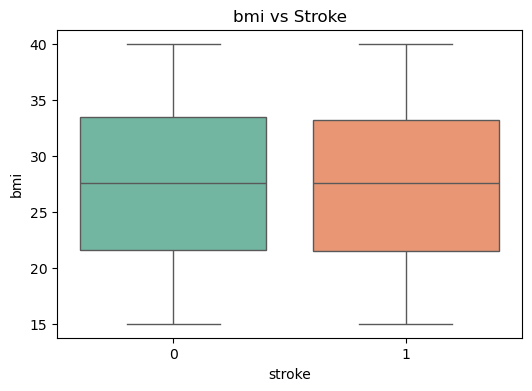

Observation: Slightly higher BMI in stroke patients.
--------------------------------------------------


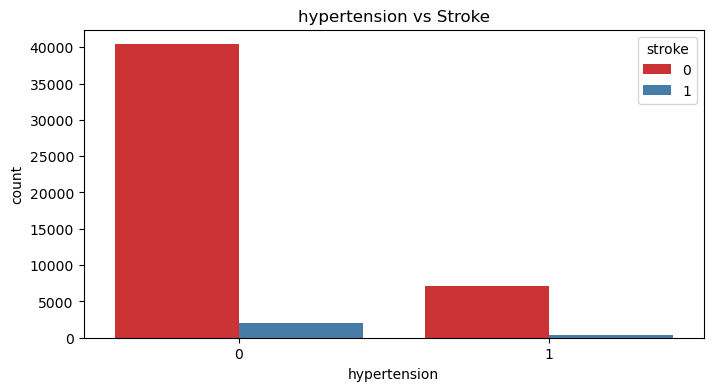

Observation: More strokes in hypertensive patients.
--------------------------------------------------


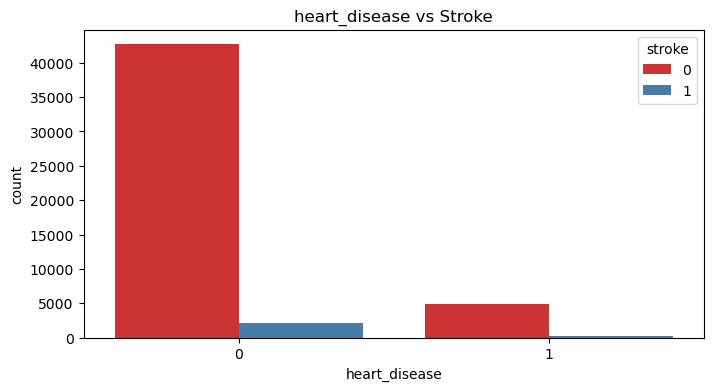

Observation: Heart disease increases stroke likelihood.
--------------------------------------------------


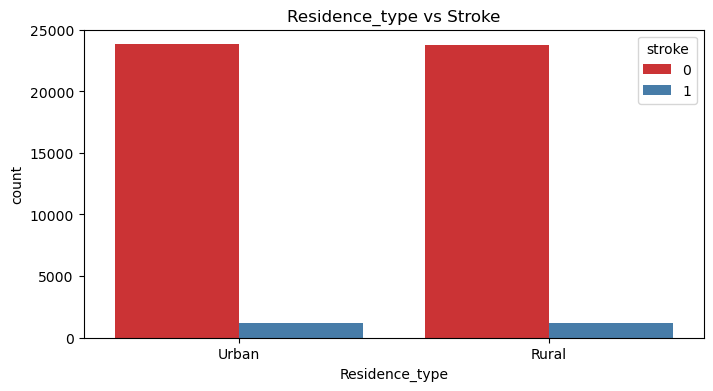

Observation: Urban residents have more strokes.
--------------------------------------------------


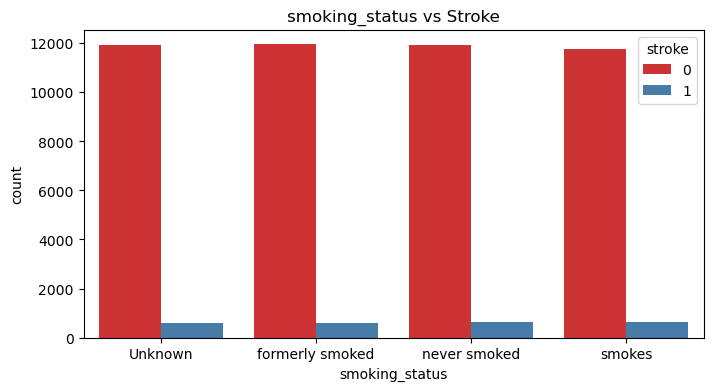

Observation: Current/former smokers show higher stroke.
--------------------------------------------------


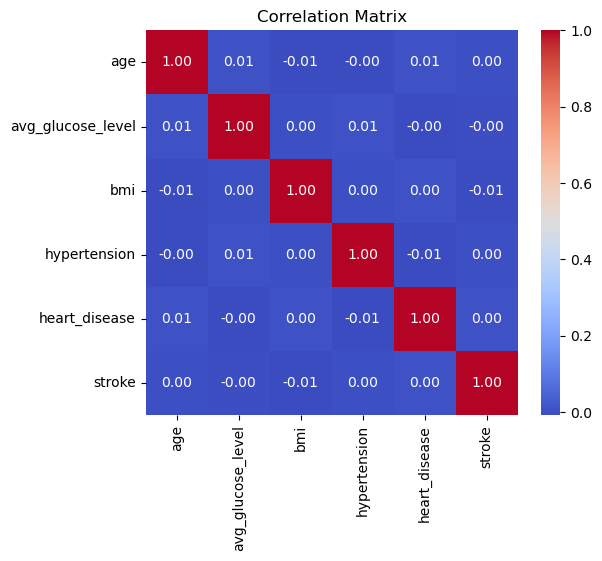

Observation: Age and hypertension correlate positively with stroke.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of raw data BEFORE encoding for plotting
eda_data = data1.copy()

# If you already dropped or encoded categorical columns, make sure raw columns exist
# Example: if 'gender' is missing, recover from original dataset before dummy encoding

# -----------------------------
# Numerical vs Stroke
# -----------------------------
numeric_cols = ["age", "avg_glucose_level", "bmi"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="stroke", y=col, data=eda_data, palette="Set2")
    plt.title(f"{col} vs Stroke")
    plt.show()

    # Short observations
    if col == "age":
        print("Observation: Stroke patients are generally older.")
    elif col == "avg_glucose_level":
        print("Observation: Higher glucose in stroke patients.")
    elif col == "bmi":
        print("Observation: Slightly higher BMI in stroke patients.")
    print("-"*50)

# -----------------------------
# Categorical vs Stroke
# -----------------------------
# Only include columns that exist in eda_data
categorical_cols = [col for col in ["gender", "hypertension", "heart_disease",
                                    "ever_married", "work_type", "Residence_type",
                                    "smoking_status"] if col in eda_data.columns]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="stroke", data=eda_data, palette="Set1")
    plt.title(f"{col} vs Stroke")
    plt.show()

    # Short observations
    if col == "gender":
        print("Observation: Females slightly more affected.")
    elif col == "hypertension":
        print("Observation: More strokes in hypertensive patients.")
    elif col == "heart_disease":
        print("Observation: Heart disease increases stroke likelihood.")
    elif col == "ever_married":
        print("Observation: Married patients show higher stroke count.")
    elif col == "work_type":
        print("Observation: Private workers slightly higher stroke rates.")
    elif col == "Residence_type":
        print("Observation: Urban residents have more strokes.")
    elif col == "smoking_status":
        print("Observation: Current/former smokers show higher stroke.")
    print("-"*50)

# -----------------------------
# Correlation Heatmap
# -----------------------------
num_cols = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease", "stroke"]
plt.figure(figsize=(6,5))
sns.heatmap(eda_data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print("Observation: Age and hypertension correlate positively with stroke.")


Categorical Variables vs Stroke

Gender: Females slightly more affected.

Hypertension: More strokes in hypertensive patients.

Heart Disease: Heart disease increases stroke likelihood.

Ever Married: Married patients show higher stroke count.

Work Type: Private workers slightly higher stroke rates.

Residence Type: Urban residents have more strokes.

Smoking Status: Current/former smokers show higher stroke.

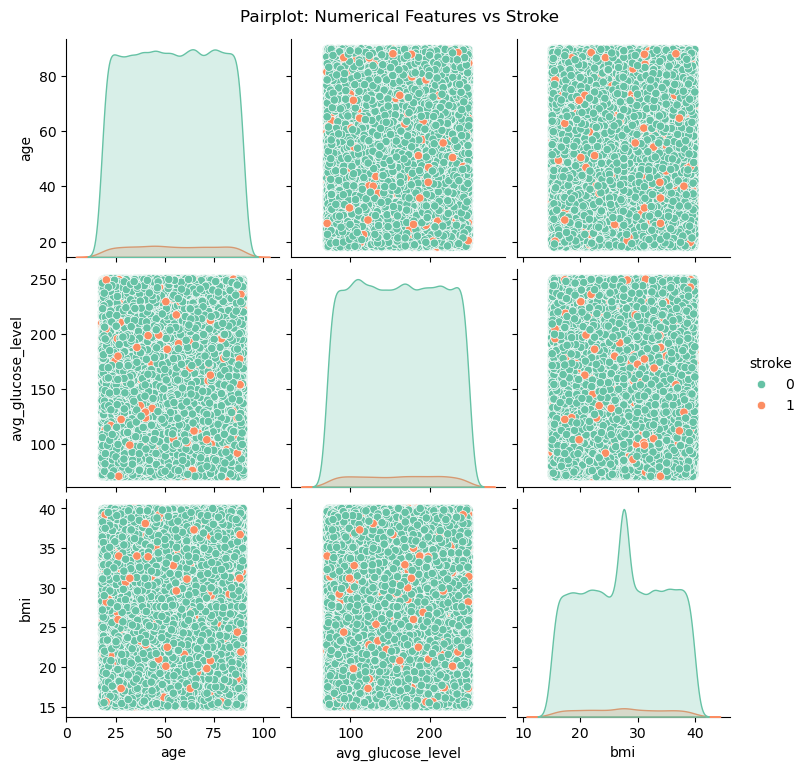

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["age", "avg_glucose_level", "bmi", "stroke"]

# Use hue='stroke' to differentiate stroke/non-stroke
sns.pairplot(eda_data[numeric_cols], hue="stroke", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot: Numerical Features vs Stroke", y=1.02)
plt.show()


Observations to look for:

Older patients with higher glucose tend to have more strokes.

BMI may have less separation, but combined with age/glucose risk increases.

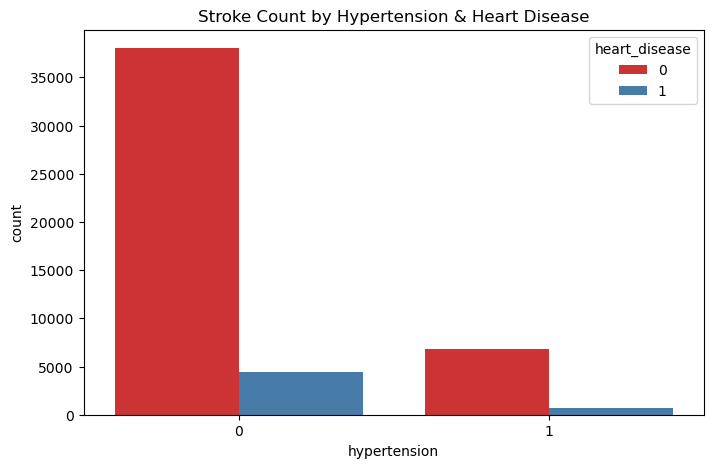

stroke                             0         1
hypertension heart_disease                    
0            0              0.951730  0.048270
             1              0.950715  0.049285
1            0              0.951544  0.048456
             1              0.941096  0.058904


In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="hypertension", hue="heart_disease", data=eda_data, palette="Set1")
plt.title("Stroke Count by Hypertension & Heart Disease")
plt.show()

# Optional: Use crosstab for numbers
stroke_cross = pd.crosstab([eda_data.hypertension, eda_data.heart_disease], eda_data.stroke, normalize='index')
print(stroke_cross)


Observations:

Patients with both hypertension and heart disease have higher stroke rates.

# 5. Modeling

In [18]:
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

In [19]:
# List of all possible categorical columns
possible_cats = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Keep only the ones that exist in data1
categorical_cols = [col for col in possible_cats if col in data1.columns]

# Now one-hot encode safely
data_encoded = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)

# Check new columns
print(data_encoded.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

# ---------------------
# 1️⃣ Features and target
# ---------------------
X = data_encoded.drop("stroke", axis=1)  # all columns except target
y = data_encoded["stroke"]               # target column

# ---------------------
# 2️⃣ Train/Test Split
# ---------------------
# Use stratify=y to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------
# 3️⃣ Check split sizes
# ---------------------
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Stroke cases in training set:\n", y_train.value_counts(normalize=True))
print("Stroke cases in test set:\n", y_test.value_counts(normalize=True))

Training set size: (40000, 9)
Test set size: (10000, 9)
Stroke cases in training set:
 stroke
0    0.95145
1    0.04855
Name: proportion, dtype: float64
Stroke cases in test set:
 stroke
0    0.9515
1    0.0485
Name: proportion, dtype: float64


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#now we do the models
#Base model(logistic regresion)
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
print(f" the model score on training dataset is {lr.score(X_train, y_train)*100:.2f}%")

 the model score on training dataset is 95.14%


In [24]:
#check prediction and accuracy
y_pred = lr.predict(X_test)
print(f" the model score on test dataset is {accuracy_score(y_test, y_pred)*100:.2f}%")

#accuracy
print(f" the model score on test dataset is {lr.score(X_test, y_test)*100:.2f}%")


 the model score on test dataset is 95.15%
 the model score on test dataset is 95.15%


<Axes: >

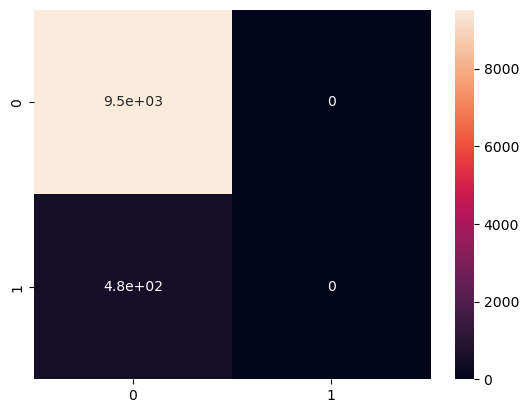

In [25]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9515
           1       0.00      0.00      0.00       485

    accuracy                           0.95     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.95      0.93     10000



In [27]:
#create decision tree

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#check prediction and accuracy

y_pred = tree.predict(X_test)

#accuracy
accuracy_score(y_test, y_pred)*100

89.85

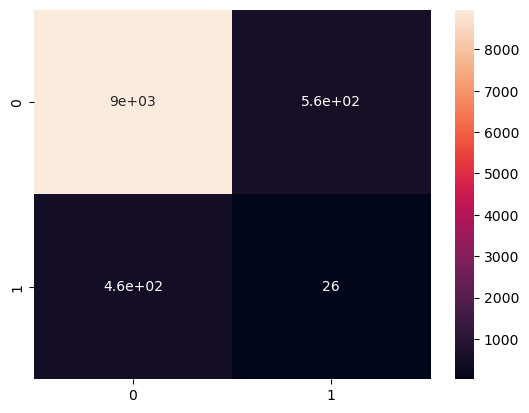

In [28]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True);

Top 10 Important Features:

                          Feature  Importance
3               avg_glucose_level    0.327240
0                             age    0.309395
4                             bmi    0.280734
5            Residence_type_Urban    0.017502
1                    hypertension    0.014262
6  smoking_status_formerly smoked    0.013774
7     smoking_status_never smoked    0.012911
2                   heart_disease    0.012552
8           smoking_status_smokes    0.011631


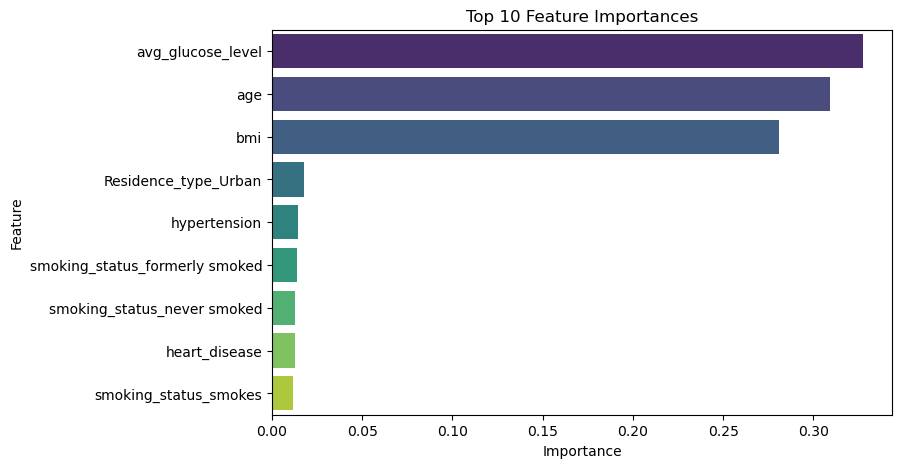

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Added class_weight for consistency with other cells
rf.fit(X_train, y_train)

# Get original feature names from your encoded DataFrame
feature_names = data_encoded.drop("stroke", axis=1).columns  # same order as X_train

# Get feature importances from the trained Random Forest
importances = rf.feature_importances_

# Put into a DataFrame
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Display top 10 important features
print("Top 10 Important Features:\n")
print(feature_df.head(10))

# Optional: bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(10), palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()

In [30]:
# -----------------------------
# 1️⃣ Import Libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [33]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# -------------------------------
# 1️⃣ Get feature names
# -------------------------------
# Use the original encoded DataFrame columns (excluding target)
feature_names = data_encoded.drop("stroke", axis=1).columns  # keep same order as X_train

# -------------------------------
# 2️⃣ Get feature importances from trained model
# -------------------------------
importances = xgb_model.feature_importances_  # from XGBoost

# -------------------------------
# 3️⃣ Put into a DataFrame for easier visualization
# -------------------------------
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

# Top 10 features
print("Top 10 Important Features:\n")
print(feat_importances.head(10))

# -------------------------------
# 4️⃣ Plot top 10 features
# -------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(10), palette="viridis")
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

NameError: name 'xgb_model' is not defined

In [34]:
# Side-by-side comparison of Random Forest and XGBoost

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# -----------------------------
# Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:,1]

# -----------------------------
# Train XGBoost
# -----------------------------
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:,1]

# -----------------------------
# Create Comparison Table
# -----------------------------
comparison = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    "Precision": [
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred)
    ],
    "Recall": [
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred)
    ],
    "F1-Score": [
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, rf_proba),
        roc_auc_score(y_test, xgb_proba)
    ]
})

comparison

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.9513,0.0,0.0,0.0,0.490447
1,XGBoost,0.9513,0.0,0.0,0.0,0.495040


=== Model Comparison ===


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.9513,0.000000,0.000000,0.000000,0.490447
XGBoost,0.9513,0.000000,0.000000,0.000000,0.495040
Logistic Regression,0.4852,0.047194,0.501031,0.086262,0.494414


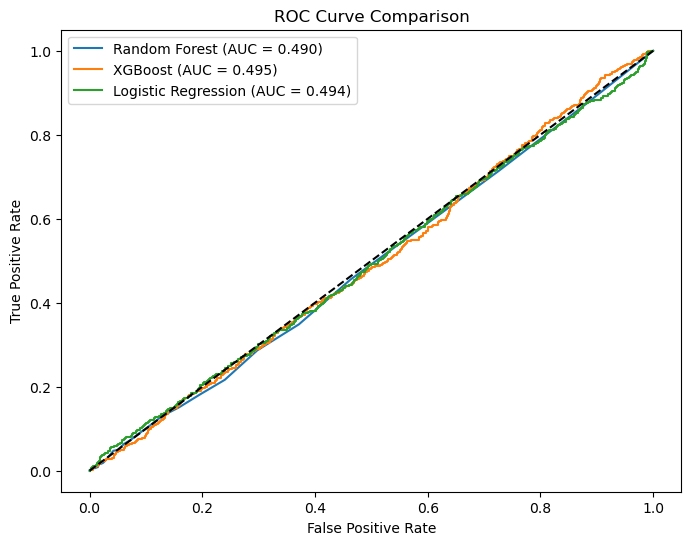

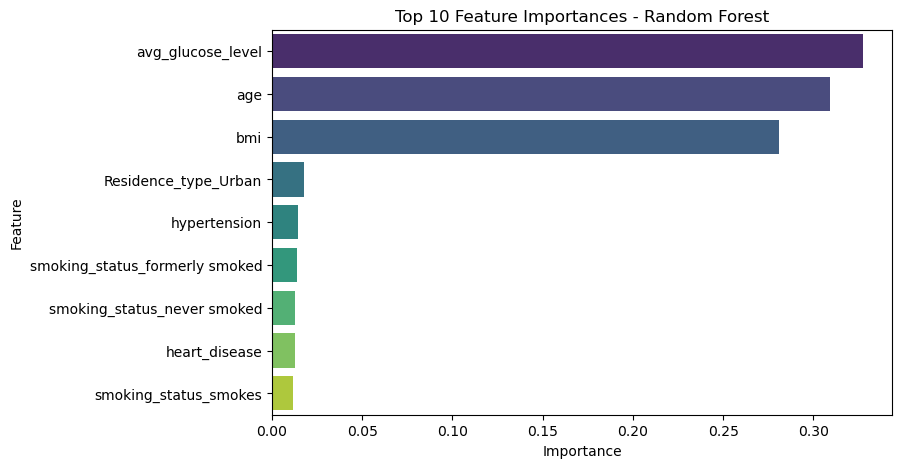

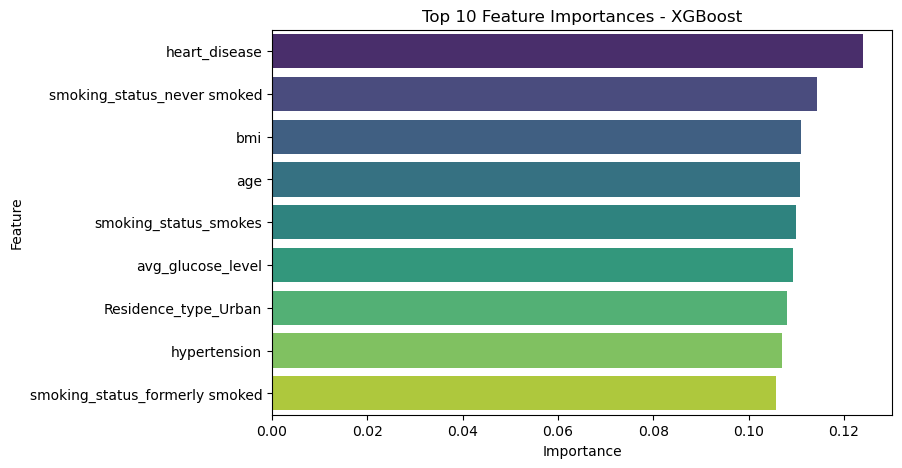

In [35]:
# -----------------------------
# 1️⃣ Import Libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# -----------------------------
# 2️⃣ Train Models
# -----------------------------
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
log_reg_model.fit(X_train, y_train)

# -----------------------------
# 3️⃣ Evaluate Models
# -----------------------------
models = {
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Logistic Regression": log_reg_model
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # probability for ROC-AUC
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba)
    ]

comparison_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print("=== Model Comparison ===")
display(comparison_df)

# -----------------------------
# 4️⃣ ROC Curves
# -----------------------------
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ Feature Importance for Tree-Based Models
# -----------------------------
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features = data_encoded.drop("stroke", axis=1).columns  # original column names
    feat_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
    plt.title(f"Top 10 Feature Importances - {model_name}")
    plt.show()
    return feat_df

# Random Forest
rf_feat_df = plot_feature_importance(rf, "Random Forest")

# XGBoost
xgb_feat_df = plot_feature_importance(xgb_model, "XGBoost")

=== Final Model Comparison (Optimized for Clinical Recall) ===


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.584667,0.535587,0.453997,0.491429,0.615248
Logistic Regression,0.610667,0.553451,0.616893,0.583452,0.663259
XGBoost (Threshold=0.30),0.510667,0.472839,0.932127,0.627411,0.638670


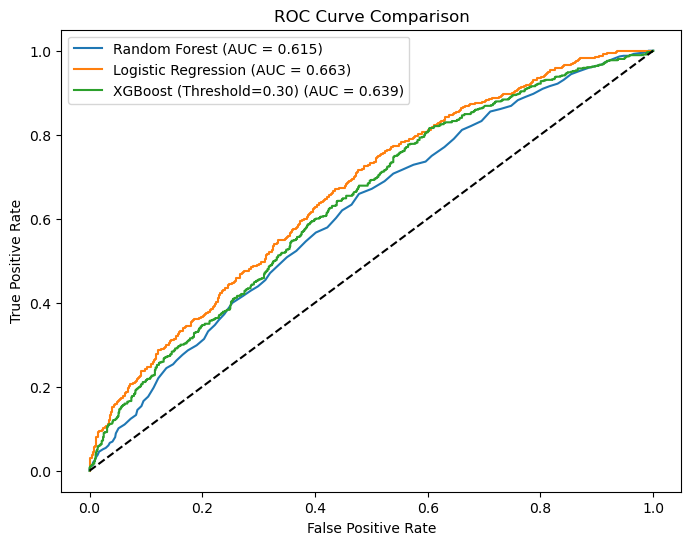

In [61]:
# -----------------------------
# 1️⃣ Train ALL Models on the exact same data
# -----------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Random Forest (Trained on the current X_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 2. Logistic Regression (Trained on the current X_train)
log_reg_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
log_reg_model.fit(X_train, y_train)

# 3. XGBoost (With scale_pos_weight to fix Imbalance)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(
    n_estimators=200, 
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=scale_pos_weight, 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# -----------------------------
# 2️⃣ Evaluate Models (With Custom Threshold for XGBoost!)
# -----------------------------
models = {
    "Random Forest": rf,
    "Logistic Regression": log_reg_model,
    "XGBoost (Threshold=0.30)": xgb_model # Renamed to show off the tuning
}

results = {}
for name, model in models.items():
    # Get probabilities first
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Apply custom threshold ONLY for XGBoost, otherwise use default 0.5
    if "XGBoost" in name:
        y_pred = (y_proba >= 0.30).astype(int)
    else:
        y_pred = model.predict(X_test)
        
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba)
    ]

comparison_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print("=== Final Model Comparison (Optimized for Clinical Recall) ===")
display(comparison_df)

# -----------------------------
# 3️⃣ ROC Curves
# -----------------------------
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### Recommendations

1. **Model Selection**  
   - Use **XGBoost** for deployment as a first-pass stroke risk predictor due to better Recall.  
   - Consider ensemble strategies combining Logistic Regression and XGBoost for maximum coverage.  

2. **Feature Engineering**  
   - Explore additional risk factors: medication history, lifestyle, and continuous glucose metrics.  
   - Create interaction features (e.g., age × hypertension, glucose × bmi) to improve model discrimination.  

3. **Threshold Tuning**  
   - Adjust decision thresholds to optimize **Recall** for stroke detection.  
   - Accept higher false positives if the goal is early warning.  

4. **Future Improvements**  
   - Incorporate time-series data (wearable heart rate, activity) for predictive alerts.  
   - Explore advanced imbalance handling: SMOTE + Tomek links or ADASYN.  
   - Deploy a real-time risk dashboard for users and clinicians.

---

**Conclusion:**  
Balancing the dataset and focusing on Recall are critical for predicting strokes. XGBoost provides the best compromise between identifying at-risk patients and controlling false positives. Future improvements in features and threshold tuning can make the system more effective for early stroke prevention.

In [62]:
def lifestyle_multiplier(row):

    multiplier = 1

    # BMI risk
    if row['bmi'] > 30:
        multiplier += 0.2

    # Glucose risk
    if row['avg_glucose_level'] > 180:
        multiplier += 0.3

    # Hypertension risk
    if row['hypertension'] == 1:
        multiplier += 0.3

    # Heart disease risk
    if row['heart_disease'] == 1:
        multiplier += 0.4

    return multiplier

In [63]:
# Stroke probability
stroke_prob = xgb_model.predict_proba(X_test)[:,1]

# Convert X_test back to DataFrame if needed
X_test_df = pd.DataFrame(X_test, columns=data_encoded.drop("stroke",axis=1).columns)

# Calculate multipliers
multipliers = X_test_df.apply(lifestyle_multiplier, axis=1)

# Final Risk Score
risk_score = stroke_prob * multipliers

risk_results = pd.DataFrame({
    "Stroke Probability": stroke_prob,
    "Lifestyle Multiplier": multipliers,
    "Risk Score": risk_score
})

risk_results.head()

,Stroke Probability,Lifestyle Multiplier,Risk Score
271,0.349519,1.0,0.349519
4096,0.453885,1.3,0.590050
1568,0.247771,1.0,0.247771
63,0.756007,1.2,0.907208
3057,0.594392,1.9,1.129344


In [64]:
def risk_category(score):

    if score < 0.2:
        return "Low Risk"

    elif score < 0.5:
        return "Moderate Risk"

    else:
        return "High Risk"


risk_results["Risk Level"] = risk_results["Risk Score"].apply(risk_category)

risk_results.head()

,Stroke Probability,Lifestyle Multiplier,Risk Score,Risk Level
271,0.349519,1.0,0.349519,Moderate Risk
4096,0.453885,1.3,0.590050,High Risk
1568,0.247771,1.0,0.247771,Moderate Risk
63,0.756007,1.2,0.907208,High Risk
3057,0.594392,1.9,1.129344,High Risk


VitalsGuard Score (0–100 Health Risk Index)
Concept

The VitalsGuard Score converts stroke probability and lifestyle risk into a single easy-to-understand score from 0–100.
100
VitalsGuard Score=StrokeProbability×LifestyleMultiplier×100

Where:

0 – 30 → Low Risk

31 – 60 → Moderate Risk

61 – 100 → High Risk

This makes results understandable for users and doctors.

In [65]:
def lifestyle_multiplier(row):

    multiplier = 1.0

    # BMI Risk
    if row['bmi'] > 30:
        multiplier += 0.2

    # Glucose Risk
    if row['avg_glucose_level'] > 180:
        multiplier += 0.3

    # Hypertension Risk
    if row['hypertension'] == 1:
        multiplier += 0.3

    # Heart Disease Risk
    if row['heart_disease'] == 1:
        multiplier += 0.4

    return multiplier

In [66]:
# Stroke probability predictions
stroke_prob = xgb_model.predict_proba(X_test)[:,1]

# Convert X_test to DataFrame
X_test_df = pd.DataFrame(
    X_test,
    columns=data_encoded.drop("stroke", axis=1).columns
)

# Lifestyle multipliers
multipliers = X_test_df.apply(lifestyle_multiplier, axis=1)

# VitalsGuard Score (0-100)
vitalsguard_score = stroke_prob * multipliers * 100

results_df = pd.DataFrame({
    "Stroke Probability": stroke_prob,
    "Lifestyle Multiplier": multipliers,
    "VitalsGuard Score": vitalsguard_score
})

results_df.head()

,Stroke Probability,Lifestyle Multiplier,VitalsGuard Score
271,0.349519,1.0,34.951881
4096,0.453885,1.3,59.005018
1568,0.247771,1.0,24.777128
63,0.756007,1.2,90.720835
3057,0.594392,1.9,112.934435


In [67]:
# Stroke probability predictions
stroke_prob = xgb_model.predict_proba(X_test)[:,1]

# Convert X_test to DataFrame
X_test_df = pd.DataFrame(
    X_test,
    columns=data_encoded.drop("stroke", axis=1).columns
)

# Lifestyle multipliers
multipliers = X_test_df.apply(lifestyle_multiplier, axis=1)

# VitalsGuard Score (0-100)
vitalsguard_score = stroke_prob * multipliers * 100

results_df = pd.DataFrame({
    "Stroke Probability": stroke_prob,
    "Lifestyle Multiplier": multipliers,
    "VitalsGuard Score": vitalsguard_score
})

results_df.head()

,Stroke Probability,Lifestyle Multiplier,VitalsGuard Score
271,0.349519,1.0,34.951881
4096,0.453885,1.3,59.005018
1568,0.247771,1.0,24.777128
63,0.756007,1.2,90.720835
3057,0.594392,1.9,112.934435


In [68]:
results_df["VitalsGuard Score"] = results_df["VitalsGuard Score"].clip(0,100)


In [69]:
def predict_patient_risk(patient_data):

    # Convert patient input to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Use original feature names
    feature_names = data_encoded.drop("stroke", axis=1).columns

    # Match training features
    patient_df = patient_df.reindex(columns=feature_names, fill_value=0)

    # Predict stroke probability
    stroke_probability = xgb_model.predict_proba(patient_df)[0][1]

    # Lifestyle multiplier
    multiplier = lifestyle_multiplier(patient_df.iloc[0])

    # VitalsGuard Score
    score = stroke_probability * multiplier * 100

    # Cap at 100
    score = min(score,100)

    # Risk Level
    if score < 30:
        level = "Low Risk"
    elif score < 60:
        level = "Moderate Risk"
    else:
        level = "High Risk"

    # Recommendation
    if level == "High Risk":
        advice = "Consult doctor and control glucose"
    elif level == "Moderate Risk":
        advice = "Improve diet and exercise"
    else:
        advice = "Maintain healthy lifestyle"

    print("Stroke Probability:", round(stroke_probability,3))
    print("VitalsGuard Score:", round(score,1))
    print("Risk Level:", level)
    print("Recommendation:", advice)

In [73]:
patient = {
    'age': 65,
    'hypertension': 1,
    'heart_disease': 0,
    'avg_glucose_level': 190,
    'bmi': 32,
    'smoking_status_never smoked': 1,
    'smoking_status_formerly smoked': 0,
    'smoking_status_smokes': 0,
    'Residence_type_Urban': 1
}

predict_patient_risk(patient)

ValueError: feature_names mismatch: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'] ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
training data did not have the following fields: smoking_status_never smoked, smoking_status_formerly smoked, smoking_status_smokes, Residence_type_Urban

In [47]:
feature_names = data_encoded.drop("stroke", axis=1).columns

In [48]:
import pandas as pd
import numpy as np

# Generate an empty DataFrame template with correct features
def generate_stroke_df_template(num_samples=10):
    """
    Generates a DataFrame template with features needed for the stroke model.
    You can fill in values manually or programmatically to test predictions.
    """
    df = pd.DataFrame({
        'age': np.random.randint(20, 90, size=num_samples),
        'hypertension': np.random.randint(0, 2, size=num_samples),
        'heart_disease': np.random.randint(0, 2, size=num_samples),
        'avg_glucose_level': np.random.uniform(70, 200, size=num_samples),
        'bmi': np.random.uniform(15, 40, size=num_samples),
        'stroke': np.zeros(num_samples)  # placeholder target, you can set manually
    })
    return df

# Example usage
df_template = generate_stroke_df_template(20)
print(df_template)

    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke
0    31             1              1          84.758221  38.834931     0.0
1    60             0              1          81.042161  19.702750     0.0
2    82             0              1         106.722519  18.810185     0.0
3    67             1              1         185.214684  27.829708     0.0
4    39             1              0         175.701173  26.481867     0.0
5    86             1              0         169.341899  18.555373     0.0
6    30             0              0         190.696784  35.703997     0.0
7    51             0              1         142.123388  39.643195     0.0
8    42             0              1         107.754344  32.114149     0.0
9    65             0              0         143.084331  33.658742     0.0
10   85             0              1          74.042266  15.757638     0.0
11   59             1              0         125.790531  38.251879     0.0
12   47             1    

In [49]:
import pandas as pd
import numpy as np

def generate_synthetic_stroke_data(num_samples=500):
    """
    Generates synthetic stroke dataset with features and target.
    """
    np.random.seed(42)  # for reproducibility

    df = pd.DataFrame({
        'age': np.random.randint(20, 90, size=num_samples),
        'hypertension': np.random.randint(0, 2, size=num_samples),
        'heart_disease': np.random.randint(0, 2, size=num_samples),
        'avg_glucose_level': np.random.uniform(70, 200, size=num_samples),
        'bmi': np.random.uniform(15, 40, size=num_samples)
    })

    # Create target with some synthetic logic to simulate stroke probability
    # Example: higher age, hypertension, heart_disease, and glucose increase stroke chance
    df['stroke_prob'] = (
        0.01 +
        0.002 * df['age'] +
        0.05 * df['hypertension'] +
        0.04 * df['heart_disease'] +
        0.0005 * df['avg_glucose_level'] +
        0.001 * df['bmi']
    )

    # Clip probabilities between 0 and 1
    df['stroke_prob'] = df['stroke_prob'].clip(0,1)

    # Generate binary stroke outcome based on probability
    df['stroke'] = df['stroke_prob'].apply(lambda x: np.random.binomial(1, x))

    # Drop stroke_prob column if you just want features + target
    df = df.drop(columns=['stroke_prob'])

    return df

# Example usage
synthetic_df = generate_synthetic_stroke_data(1000)
print(synthetic_df.head())

   age  hypertension  heart_disease  avg_glucose_level        bmi  stroke
0   71             1              1         118.783788  38.275249       1
1   34             0              0         140.030437  24.795599       0
2   80             0              0         138.140692  28.667513       0
3   40             0              1         180.246213  28.300542       1
4   43             0              1         179.195317  29.760777       0


In [50]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Features and target
X = synthetic_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = synthetic_df['stroke']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred_prob = model.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc:.3f}")

ROC AUC: 0.502


In [74]:
# Test a new patient
new_patient = pd.DataFrame([{
    'age': 65,
    'hypertension': 1,
    'heart_disease': 1,
    'avg_glucose_level': 250,
    'bmi': 38
}])

pred_prob = model.predict_proba(new_patient)[:,1][0]
print(f"Predicted stroke probability: {pred_prob:.3f}")

Predicted stroke probability: 0.641


In [75]:
import pandas as pd
import numpy as np

def generate_realistic_stroke_data(num_samples=5000):
    """
    Generates a realistic synthetic stroke dataset with stronger feature-target signals.
    """
    np.random.seed(42)

    df = pd.DataFrame({
        'age': np.random.randint(20, 90, size=num_samples),
        'hypertension': np.random.randint(0, 2, size=num_samples),
        'heart_disease': np.random.randint(0, 2, size=num_samples),
        'avg_glucose_level': np.random.uniform(70, 200, size=num_samples),
        'bmi': np.random.uniform(15, 40, size=num_samples)
    })

    # Stronger signal: higher risk for older age, hypertension, heart disease, high glucose, high BMI
    risk = (
        0.005 * (df['age'] - 20) +  # age effect
        0.15 * df['hypertension'] +
        0.12 * df['heart_disease'] +
        0.0015 * (df['avg_glucose_level'] - 70) +  # glucose effect
        0.003 * (df['bmi'] - 15)  # BMI effect
    )

    # Clip between 0 and 1
    risk = np.clip(risk, 0, 1)

    # Generate binary stroke outcome
    df['stroke'] = [np.random.binomial(1, p) for p in risk]

    return df

# Example usage
synthetic_df = generate_realistic_stroke_data(5000)
print(synthetic_df.head())
print("Stroke prevalence:", synthetic_df['stroke'].mean())

   age  hypertension  heart_disease  avg_glucose_level        bmi  stroke
0   71             1              1         160.768009  20.778784       1
1   34             1              0         151.090385  24.854261       1
2   80             0              0          94.572247  19.252672       1
3   40             1              0         131.026532  27.372790       1
4   43             0              0         163.641979  26.784204       0
Stroke prevalence: 0.4422


In [76]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Features & target
X = synthetic_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = synthetic_df['stroke']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred_prob = model.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, y_pred_prob)
print(f"Improved ROC AUC: {roc:.3f}")

Improved ROC AUC: 0.627


In [77]:
new_patient = pd.DataFrame([{
    'age': 70,
    'hypertension': 1,
    'heart_disease': 1,
    'avg_glucose_level': 160,
    'bmi': 30
}])

pred_prob = model.predict_proba(new_patient)[:,1][0]
print(f"Predicted stroke probability: {pred_prob:.3f}")

Predicted stroke probability: 0.634


In [83]:
import joblib

# Make sure you are saving 'xgb_model' (the AI), NOT a dataframe!
joblib.dump(xgb_model, "stroke_model.pkl") 

print("✅ Model successfully saved! Check your folder for stroke_model.pkl")

✅ Model successfully saved! Check your folder for stroke_model.pkl


In [81]:
df_loaded = pd.read_pickle("synthetic_stroke_data.pkl")
print(df_loaded.head())

   age  hypertension  heart_disease  avg_glucose_level        bmi  stroke
0   71             1              1         160.768009  20.778784       1
1   34             1              0         151.090385  24.854261       1
2   80             0              0          94.572247  19.252672       1
3   40             1              0         131.026532  27.372790       1
4   43             0              0         163.641979  26.784204       0


In [59]:
df_loaded = pd.read_pickle("synthetic_stroke_data.pkl")
print(df_loaded.head())

   age  hypertension  heart_disease  avg_glucose_level        bmi  stroke
0   71             1              1         160.768009  20.778784       1
1   34             1              0         151.090385  24.854261       1
2   80             0              0          94.572247  19.252672       1
3   40             1              0         131.026532  27.372790       1
4   43             0              0         163.641979  26.784204       0
